# Regresión lineal: predecir los gastos médicos de pacientes

## Descarga e instalación de librerías
---

In [59]:
# Lo primero que se hará es descargar la librería regressors que ayudará a hacer un análisis más profundo sobre la regresión lineal.

# pip install regressors

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics 
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error


sns.set(style='whitegrid', context='notebook')

In [2]:
#Ubicarme en la rais para poder utilizar todas las carpetas

from sys import path
import os

path.append(os.path.realpath('../'))

## Descargando los datos
---
Descarguemos los datos y veamos cómo se ven.

In [3]:
df = pd.read_csv('../../datasets/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Preparar Datos
---


(1338, 7)


<Axes: >

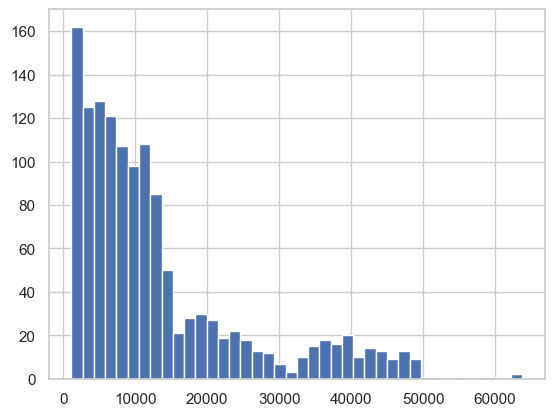

In [4]:
print(df.shape)
df.charges.hist(bins = 40)

Algo que analizar, según este gráfico, es entender qué está pasando con los datos arriba de los 50,000. Parece haber muy pocos datos de este lado.

In [20]:
df[df.charges>50000]


,age,sex,bmi,children,smoker,region,charges
34,28,male,36.400,1,yes,southwest,51194.55914
543,54,female,47.410,0,yes,southeast,63770.42801
577,31,female,38.095,1,yes,northeast,58571.07448
819,33,female,35.530,0,yes,northwest,55135.40209
1146,60,male,32.800,0,yes,southwest,52590.82939
1230,52,male,34.485,3,yes,northwest,60021.39897
1300,45,male,30.360,0,yes,southeast,62592.87309


En este caso, al ser pocos datos (7 de 1338), eliminaremos estos datos atípicos. A modo didáctico producen más ruido en la predicción que se está intentando hacer en este ejercicio.

Sin embargo es importante aclarar que NO SE DEBEN ELIMINAR datos atípicos sin antes conocer a alguien que conozca o sea experto en los datos para que pueda guiarnos mejor sobre ellos.

In [5]:
df = df[df.charges<50000]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1331 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1331 non-null   int64  
 1   sex       1331 non-null   object 
 2   bmi       1331 non-null   float64
 3   children  1331 non-null   int64  
 4   smoker    1331 non-null   object 
 5   region    1331 non-null   object 
 6   charges   1331 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.2+ KB


Ahora utilizaremos las variables categoricas!

In [25]:
columas_add = df.select_dtypes('object').columns
columas_add

Index(['sex', 'smoker', 'region'], dtype='object')

In [7]:
df.region.drop_duplicates()

0    southwest
1    southeast
3    northwest
8    northeast
Name: region, dtype: object

In [8]:
# PARA LAS VARIABLES SEX, SMOKER, REGION

df['sex'] = df['sex'].map({'male':1,'female':0})
df['smoker'] = df['smoker'].map({'yes':1,'no':0})
df['region'] = df['region'].map({'southwest':0,'southeast':1,'northwest':2,'northeast':3})

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


## EDA

---

Se observará cómo se distribuyen los datos de la variable a predecir. (cargos)

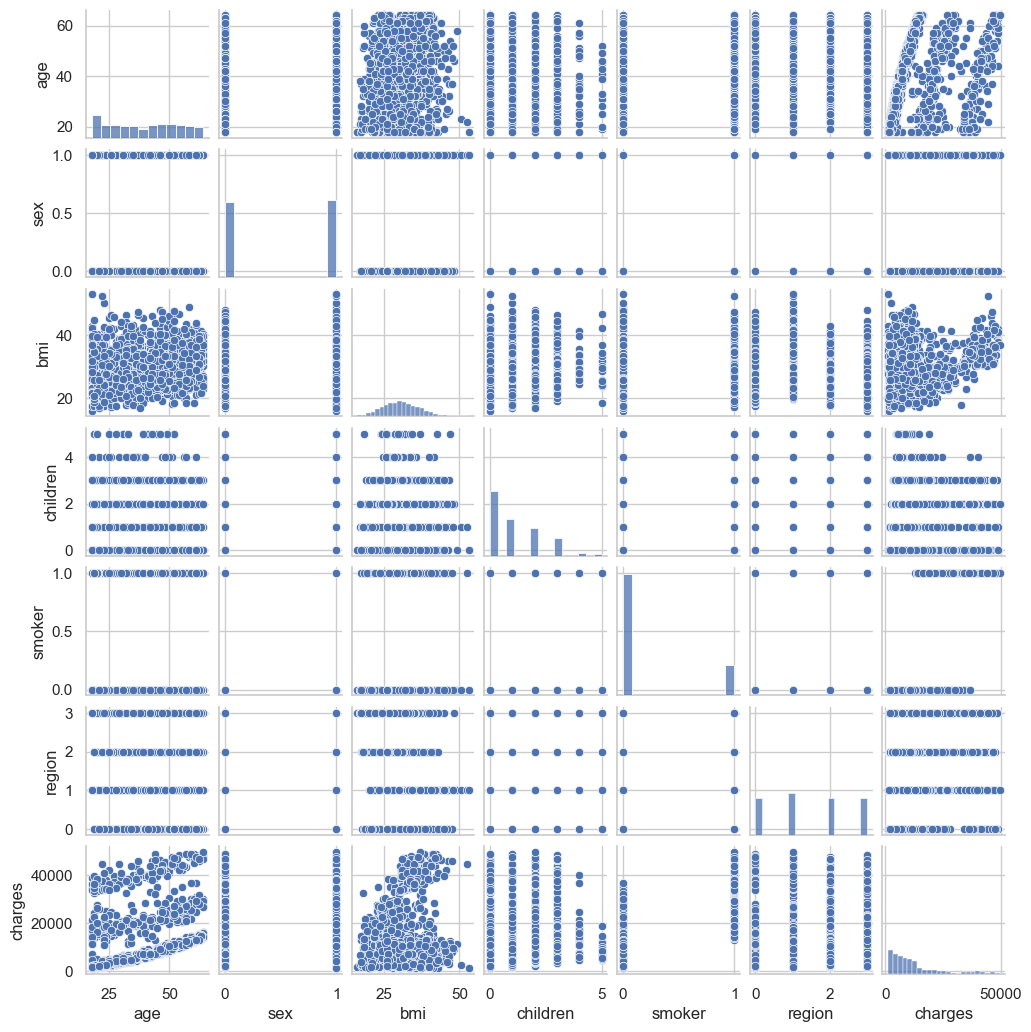

In [38]:
sns.pairplot(df, height=1.5)
plt.show()

* EDAD -> CARGOS

   observamos que hay tres grupos diferentes, procederemosa  evaluarlo con que datos se realiacion mas

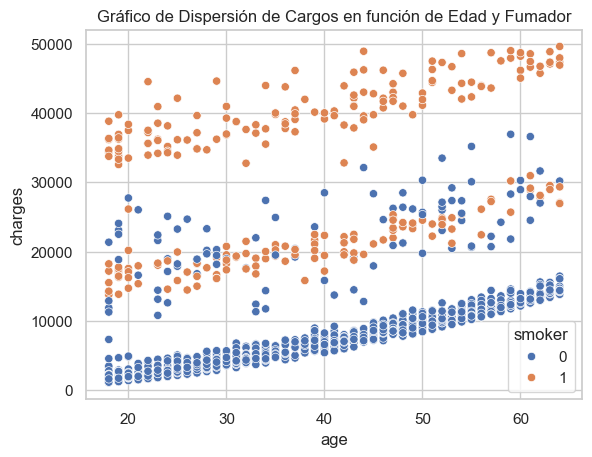

In [8]:
# EDAD y Fumadores -> Cargos


sns.scatterplot(x='age', y='charges', hue='smoker', data=df)

# Mostrar el gráfico
plt.title('Gráfico de Dispersión de Cargos en función de Edad y Fumador')
plt.show()

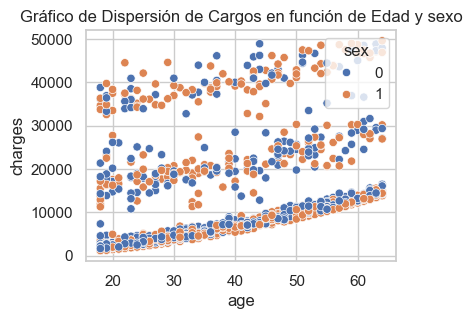

In [49]:
# EDAD y Fumadores -> Cargos

plt.figure(figsize=(4, 3))  # Ajustar el tamaño aquí
sns.scatterplot(x='age', y='charges', hue='sex', data=df)

# Mostrar el gráfico
plt.title('Gráfico de Dispersión de Cargos en función de Edad y sexo')
plt.show()

se observa que la edad y el sexo no tienen relacion con los cargos ya que estos estan dispersos en todo el grafico.

Asi que se concluye que la variable Smoker / Edad guardan relacion 

* Smoker -> CARGOS


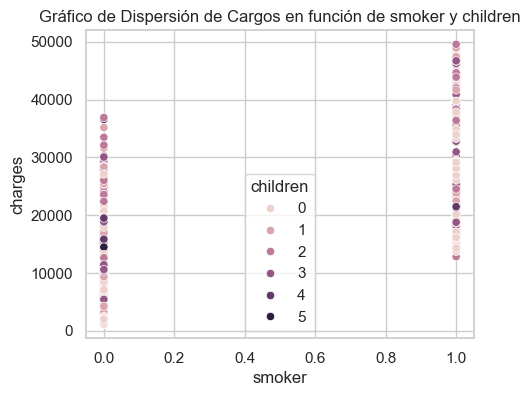

In [53]:
# Smoker y Nro Children -> Cargos

plt.figure(figsize=(5, 4))  # Ajustar el tamaño aquí
sns.scatterplot(x='smoker', y='charges', hue='children', data=df)

# Mostrar el gráfico
plt.title('Gráfico de Dispersión de Cargos en función de smoker y children')
plt.show()

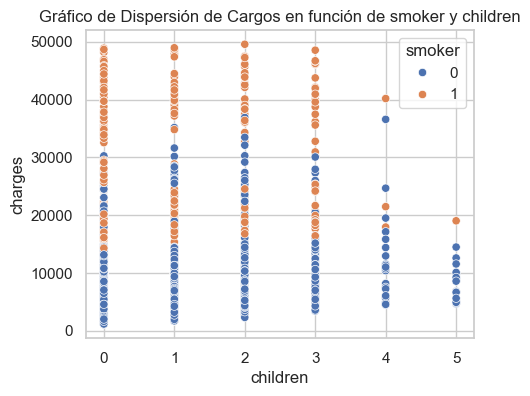

In [54]:
# Smoker y Nro Children -> Cargos

plt.figure(figsize=(5, 4))  # Ajustar el tamaño aquí
sns.scatterplot(x='children', y='charges', hue='smoker', data=df)

# Mostrar el gráfico
plt.title('Gráfico de Dispersión de Cargos en función de smoker y children')
plt.show()

Se observa que la cantidad de hijos no influye mucho en los cargos medicos. Sin embargo, se denota que si eres fumador tienedes a tener mayor gasto medico.

## Viendo correlaciones

---

Ahora entendamos nuestros datos viendo cómo se distribuyen y correlacionan.

<Axes: >

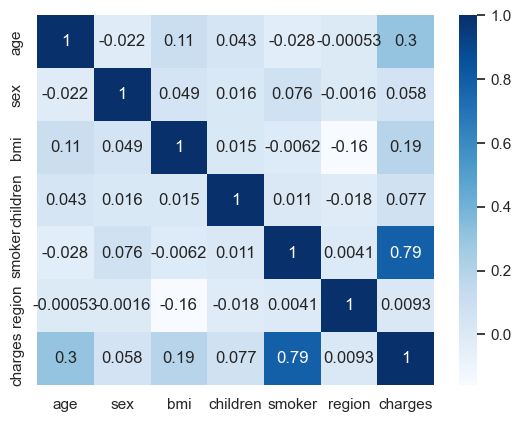

In [15]:

# Metodo corr
df.corr()
# Implementemos una funcion para visualizar nuestra matriz de correlacion 
# Usaremos heatmap de seaborn 

colormap = sns.diverging_palette(200, 10, as_cmap = True )
sns.heatmap(df.corr(), cmap="Blues", annot=True)

Se observa que las variables predictoras : SMOKER / EDAD / BMI inciden en los cargos en mayor manera

## Seleccion de mejores Variables

---


verificaremos cuales serian mejores predictoras

In [16]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [17]:
X_cols = list(set(df.columns)-set(['charges']))
y_col = ['charges']

X = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [18]:
y_pred.shape

(333, 1)

### Funciones de métricas
El siguiente punto es calcular las métricas del modelo.

In [21]:
import sklearn.metrics as metrics
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)


print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.7273
mse:  0.2655


In [23]:
from regressors import stats
#model.intercept_ = model.intercept_[0]
model.coef_ = model.coef_.reshape(-1)

In [24]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-2.1065 -0.1433  0.0751 0.2104 0.9236


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.000000    0.028320   0.0000  1.000000
region      0.040493    0.028966   1.3980  0.163056
age         0.310370    0.027627  11.2345  0.000000
sex         0.007389    0.028514   0.2591  0.795686
children    0.060732    0.028877   2.1031  0.036208
smoker      0.788700    0.030098  26.2046  0.000000
bmi         0.162285    0.027985   5.7991  0.000000
---
R-squared:  0.72726,    Adjusted R-squared:  0.72224
F-statistic: 144.88 on 6 features


Finalmente tenemos la función que calcula los residuales. Es importante notar que es una simple resta entre los valores reales y los predichos.

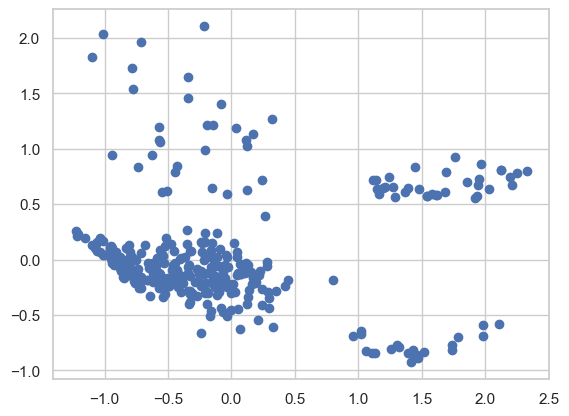

In [25]:
residuals = np.subtract(y_test, y_pred.reshape(-1))
plt.scatter(y_pred, residuals)
plt.show()

### Mejores variables del modelo
solo tomaremos las variables predictoras con p <= 0.05

In [26]:
X_cols = ['age', 'children', 'smoker', 'bmi']
y_col = ['charges']

X = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [27]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.7306
mse:  0.2755


In [28]:
model.coef_ = model.coef_.reshape(-1)

In [29]:
y_test = y_test.reshape(-1)

print("==========Summary==========")
stats.summary(model, X_test, y_test, X_cols)

==========Summary==========
Residuals:
    Min      1Q  Median     3Q    Max
-1.9063 -0.1059   0.092 0.2351 1.0165


Coefficients:
            Estimate  Std. Error  t value   p value
_intercept  0.000000    0.028874   0.0000  1.000000
age         0.306514    0.030259  10.1298  0.000000
children    0.048013    0.027417   1.7512  0.080836
smoker      0.802318    0.027455  29.2229  0.000000
bmi         0.149076    0.028867   5.1643  0.000000
---
R-squared:  0.73056,    Adjusted R-squared:  0.72728
F-statistic: 222.34 on 4 features


AHORA OBSERVO QUE LA VARIABLE CHILDREN NO INFLUYE MUCHO, ASI QUE LA QUITARE DEL MODELO !!




In [31]:
X_cols = ['age', 'smoker', 'bmi']
y_col = ['charges']

X = df[X_cols].values
y = df[y_col].values

X_train, X_test, y_train, y_test = train_test_split(X,y)
sc_x = StandardScaler().fit(X)
sc_y = StandardScaler().fit(y)

X_train = sc_x.transform(X_train)
X_test = sc_x.transform(X_test)
y_train = sc_y.transform(y_train)
y_test = sc_y.transform(y_test)

model = LinearRegression(fit_intercept=False)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [32]:
mse = metrics.mean_squared_error(y_test,y_pred)
r2 = metrics.r2_score(y_test, y_pred)

print("r2 ", r2.round(4))
print("mse: ", mse.round(4))

r2  0.7694
mse:  0.2562


! R² (Coeficiente de Determinación)    OBSERVO QUE r2 subio de 0.73 -> 0.76

! MSE (Error Cuadrático Medio):        mse bajo y se acerca mas a 0 -> 0.25

Las variables predictoras que mas influyen son: 

X_cols = ['AGE', 'smoker', 'bmi']


## Construccion de modelos

---


Crearemos el modelo con todas las variables

In [9]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


### DIvision de los datos

In [10]:
#variables independientes
X = df.drop('charges', axis=1)

#variable dependiente
y = df['charges']  # PREDECIR

In [11]:
from sklearn.model_selection import train_test_split

#división en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Creando el modelo de Regresion Lineal Multiple
---

In [12]:
from sklearn.linear_model import LinearRegression

#Inicializando el modelo
lr = LinearRegression()

In [13]:
#Entrenamiento
lr.fit(X_train, y_train)

LinearRegression()

In [14]:
#Prueba
prediccion_lr = lr.predict(X_test)

In [15]:
#Resultados de la predicción
prediccion_lr

array([ 9800.0095887 ,  9297.68400203,  7553.57674723, 31479.01510162,
        6777.65505119,  4643.84737269,  5952.87769445,  9632.9570567 ,
       12100.45621555, 32244.5197405 , 10822.91942024, 11579.71044099,
       15878.02888279,  9065.0238891 , 32423.21363243, 26329.81752109,
       12788.55949034,  4324.14871794,  1716.03542371,  4293.67676737,
        9835.9582597 , 14168.93622153,  4489.1850694 ,   833.97519248,
        8124.46882612, 32121.52506197,  5546.94977657,  2862.45172152,
       10476.13269089, 33932.84469264,  4453.52125634,  7302.84571782,
       11668.81285744, 28046.58022599, 33239.76714331, 15396.83789988,
        4297.47611369, 17345.53277651,  7553.25658757,  4063.30421885,
        9070.17601169, 26093.97820492, 10637.66785708,  5964.42042713,
        8045.3336708 ,  9461.25791084, 10646.57083305, 27712.13979407,
       23678.34707896, 34608.79402093,  2329.09910632,  4138.31390044,
        7987.63760679, 10544.87149972, 39595.39418498, -1440.1962479 ,
      

#### Metrica de Desempeño

Coeficiente de Determinación .

* Averiguar qué tan “bien” se ajusta una línea de regresión muestral a los datos
* r2 se encuentra entre 0 y 1
* r2 mide la proporción o porcentaje de la variación total de Y explicada por el modelo de regresión".

In [16]:
#importar la biblioteca
from sklearn.metrics import r2_score

In [17]:
#RENDIMIENTO DEL MODELO

r2_lr = r2_score(y_test, prediccion_lr)
r2_lr

0.7655682465617253

In [18]:
# METRICAS FINALES (OPCIONALES)

# Calcular el error cuadrático medio
mse = mean_squared_error(y_test, prediccion_lr)
print("Error cuadrático medio:", mse)

# Imprimir los coeficientes y el sesgo - Valores de los pesos del modelo de regresión
print("Coeficientes:", lr.coef_)
print("Sesgo (Coeficiente W0:", lr.intercept_)
print("Coeficiente W1:", lr.coef_[0])
print("Coeficiente W2:", lr.coef_[1])

# Imprimir el coeficientes de determinación
print("Coeficiente de determinación:", lr.score(X_train, y_train))

Error cuadrático medio: 35485218.23538833
Coeficientes: [  255.74614337    88.46564745   265.2807616    574.52802726
 22776.22570912   430.48717789]
Sesgo (Coeficiente W0: -11021.370528427115
Coeficiente W1: 255.7461433692514
Coeficiente W2: 88.46564745010141
Coeficiente de determinación: 0.7439673808976097


C:\Users\Rez3t\AppData\Local\Temp\ipykernel_9648\2013715480.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
C:\Users\Rez3t\AppData\Local\Temp\ipykernel_9648\2013715480.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplo

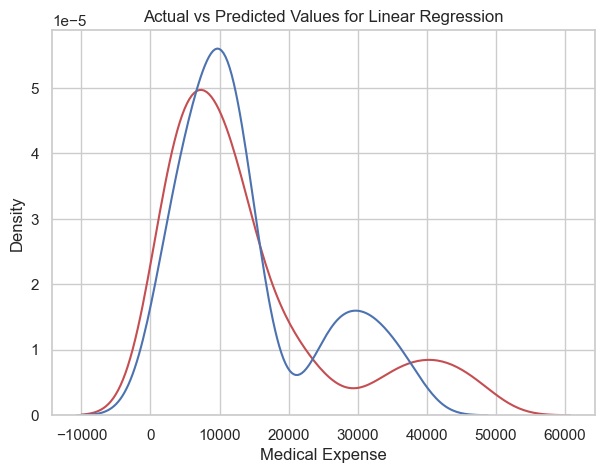

In [24]:
#distribution of actual and predicted values
plt.figure(figsize=(7,5))
ax1 = sns.distplot(y_test,hist=False,color='r',label='Actual Value')
sns.distplot(prediccion_lr,hist=False,color='b',label='Predicted Value',ax=ax1)
plt.title('Actual vs Predicted Values for Linear Regression')
plt.xlabel('Medical Expense')
plt.show()

#### Probando el modelo




In [19]:
X.head(5)

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2


In [20]:
primera_fila_array = X.iloc[0].to_numpy()
primera_fila_array

array([19. ,  0. , 27.9,  0. ,  1. ,  0. ])

In [21]:
df.head(1)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.9,0,1,0,16884.924


In [22]:
# Realizar la predicción utilizando el modelo entrenado
prediccion = lr.predict([primera_fila_array])

# Imprimir el resultado de la predicción
#print(f"Resultado de la predicción: {prediccion[0]:.2f}")

print("Resultado de la predicción: " + str(prediccion[0]) )

Resultado de la predicción: 24015.36515339464


d:\STUDY\Python\Machine_Learning\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [73]:
# EL VALOR REAL ES:

#datos_Outlet_dummies.head(5)

df.iloc[0]["charges"]

16884.924

### Creando el modelo de Arbol de desicion
---

In [25]:
#decision tree regressor
from sklearn.tree import DecisionTreeRegressor
dtree = DecisionTreeRegressor()
dtree

DecisionTreeRegressor()

In [26]:
#model training
dtree.fit(X_train,y_train)
#model accuracy
dtree.score(X_train,y_train)

1.0

In [28]:
#model prediction
dtree_pred = dtree.predict(X_test)

C:\Users\Rez3t\AppData\Local\Temp\ipykernel_9648\1470506590.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Rez3t\AppData\Local\Temp\ipykernel_9648\1470506590.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

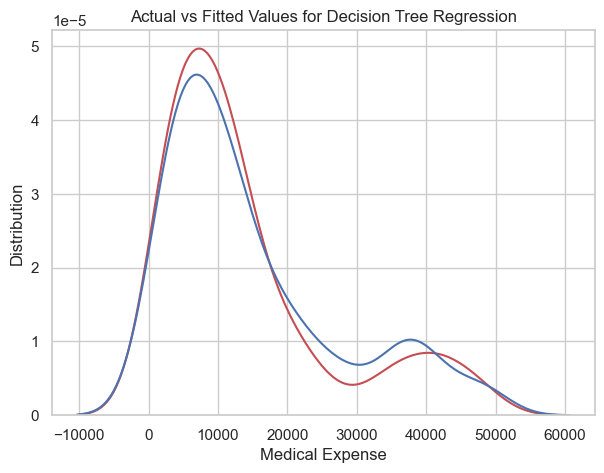

In [29]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(dtree_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Decision Tree Regression')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

#### Metrica de Desempeño

In [41]:
from sklearn.metrics import r2_score

In [42]:
#RENDIMIENTO DEL MODELO

r2_lr = r2_score(y_test, dtree_pred)
r2_lr

0.6860134346381963

#### Probando el modelo



In [32]:
X.head(5)

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,0
1,18,1,33.770,1,0,1
2,28,1,33.000,3,0,1
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2


In [50]:
primera_fila_array = X.iloc[0].to_numpy()
primera_fila_array



array([19. ,  0. , 27.9,  0. ,  1. ,  0. ])

In [43]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [51]:
# Realizar la predicción utilizando el modelo entrenado
prediccion = dtree.predict([primera_fila_array])

# Imprimir el resultado de la predicción
#print(f"Resultado de la predicción: {prediccion[0]:.2f}")

print("Resultado de la predicción: " + str(prediccion[0]) )

Resultado de la predicción: 16884.924


d:\STUDY\Python\Machine_Learning\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeRegressor was fitted with feature names
  warnings.warn(


In [61]:
print('MAE:', mean_absolute_error(y_test, dtree_pred))
print('MSE:', mean_squared_error(y_test, dtree_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, dtree_pred)))
print('Accuracy:', dtree.score(X_test,y_test))

MAE: 3383.0866203500004
MSE: 47527187.04455393
RMSE: 6893.996449415529
Accuracy: 0.6860134346381963


OVERFITING - SOBRE ENTRENADO AL SCORE : 1

### Creando el modelo de Random FOrest
---

In [52]:
#random forest regressor
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100)
rf

RandomForestRegressor()

In [54]:
#model training
rf.fit(X_train,y_train)
#model accuracy
rf.score(X_train,y_train)

0.9754662757907571

In [56]:
#model prediction
rf_pred = rf.predict(X_test)

C:\Users\Rez3t\AppData\Local\Temp\ipykernel_9648\4145278179.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
C:\Users\Rez3t\AppData\Local\Temp\ipykernel_9648\4145278179.py:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distp

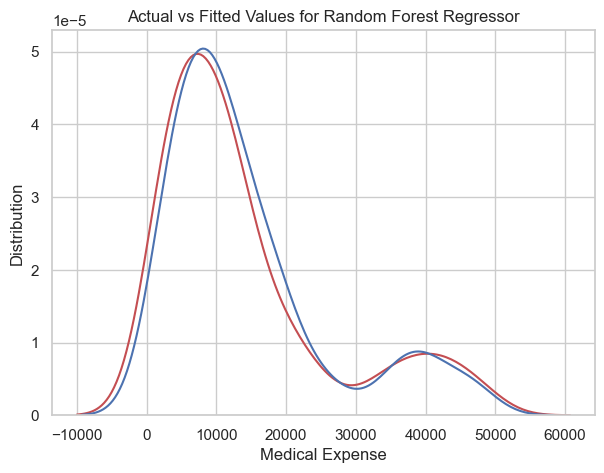

In [57]:
#distribution plot of actual and predicted values
plt.figure(figsize=(7,5))
ax = sns.distplot(y_test, hist=False, color="r", label="Actual Value")
sns.distplot(rf_pred, hist=False, color="b", label="Fitted Values" , ax=ax)
plt.title('Actual vs Fitted Values for Random Forest Regressor')
plt.xlabel('Medical Expense')
plt.ylabel('Distribution')
plt.show()

In [60]:
print('MAE:', mean_absolute_error(y_test, rf_pred))
print('MSE:', mean_squared_error(y_test, rf_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, rf_pred)))
print('Accuracy:', rf.score(X_test,y_test))

MAE: 2637.8421745510004
MSE: 22814358.005998
RMSE: 4776.437794632941
Accuracy: 0.8492778058898665


In [63]:
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [70]:
# Realizar la predicción utilizando el modelo entrenado
#val = [[32,1,28.880,0,0,2]]
#val = [[33,1,22.705,0,0,2]]

#val = [[19,0,27.900,0,1,0]]
val = [[28,1,33,3,0,1]]

prediccion = rf.predict(val)

# Imprimir el resultado de la predicción
#print(f"Resultado de la predicción: {prediccion[0]:.2f}")

print("Resultado de la predicción: " + str(prediccion[0]) )

Resultado de la predicción: 4941.3828641


d:\STUDY\Python\Machine_Learning\env\lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


## ME QUEDO CON RANDOM FOREST!